<a href="https://colab.research.google.com/github/blr-ka-in/Deep-Learning/blob/main/Customer_Retention_Modelling_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data

In [7]:
#df=pd.read_excel('TelcoChurn.xlsx')
#from google.colab import drive
#drive.mount('/content/drive/Colab Drive/Deep Learning/TelcoChurn.xlsx')
df=pd.read_excel('/content/TelcoChurn.xlsx')

In [8]:
df.shape

(7043, 21)

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Setting Display options to ensure feature name visibility

In [11]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [12]:
import warnings
warnings.filterwarnings('ignore')

# How many rows have missing ID ?

In [13]:
df['customerID'].isnull().sum()

0

# Drop ID Feature from the dataset

In [14]:
df=df.drop(['customerID'],axis=1)

# Label the Churn feature to 1/0

In [15]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
df['target']=np.where(df['Churn']=="Yes",1,0)

# Drop the Churn feature to retain only Target 

In [17]:
df=df.drop(['Churn'],axis=1)

# Defining Target and Independent Features

In [18]:
Y=df[['target']]
X=df.drop(['target'],axis=1)

# Get the Churn Rate

In [19]:
Y.mean()

target    0.26537
dtype: float64

# Split features into Numerical and Categorical

In [20]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [21]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [22]:
#Check whether SeniorCitizon feaure is an indicator
num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [23]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


# Dropping the indicator features from num to build a separate DF

In [24]:
ind=num[['SeniorCitizen']]
num=num.drop(['SeniorCitizen'],axis=1)

# Outlier Analysis of Numerical Features

In [25]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.871000
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


# Capping and Flooring of outliers

In [26]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [27]:
num=num.apply(lambda x : outlier_cap(x))

In [28]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2277.243407
std,24.557454,30.062810,2260.002318
min,1.000000,19.200000,19.871000
1%,1.000000,19.200000,19.883180
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


# Missing Value Analysis

In [29]:
num.isnull().mean()

tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

In [30]:
# Since the data does not contain any missing values Imputation Processes are not required

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [31]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [32]:
num_1.iloc[0]

tenure             1.00
MonthlyCharges    29.85
TotalCharges      29.85
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [33]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


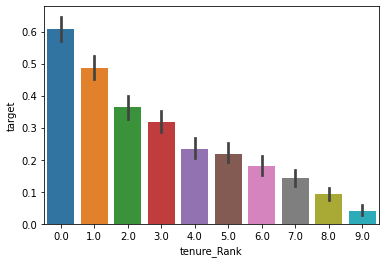

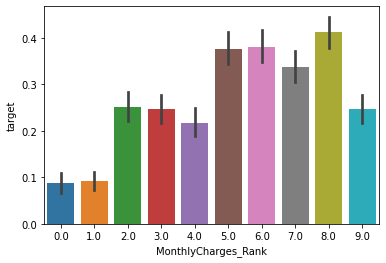

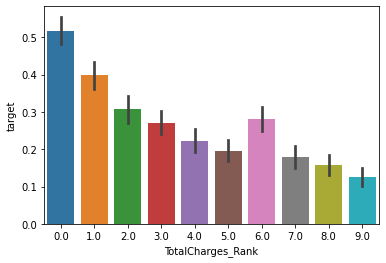

In [34]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [35]:
# All features from num_2 will get selected due to good discrimination
select_features_df_num=num_1

In [36]:
num_1.shape

(7043, 3)

# Feature Selection - Categorical Features 

In [37]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

# Part 1 - Bi Variate Analysis

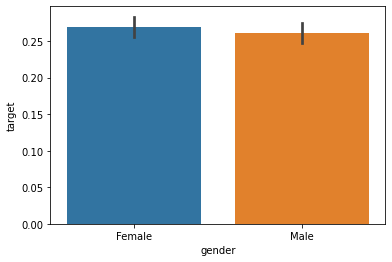

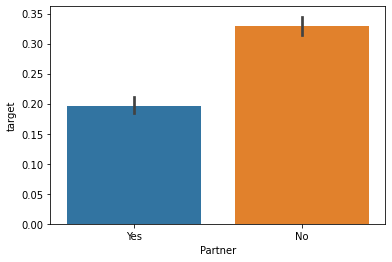

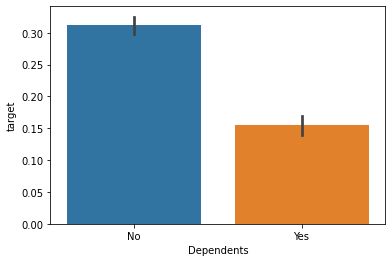

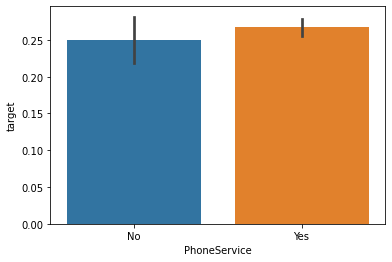

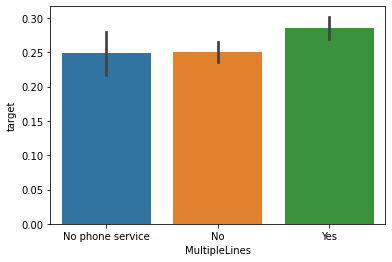

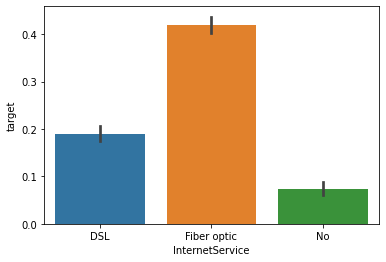

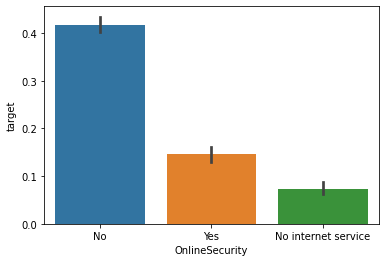

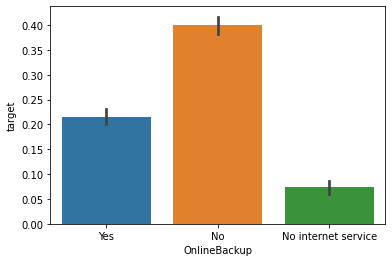

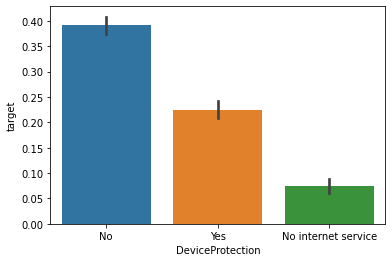

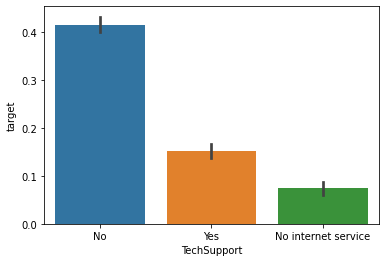

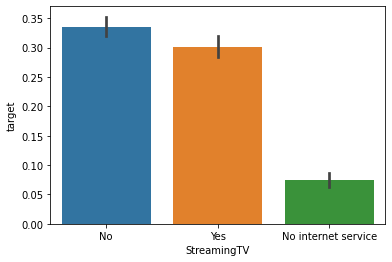

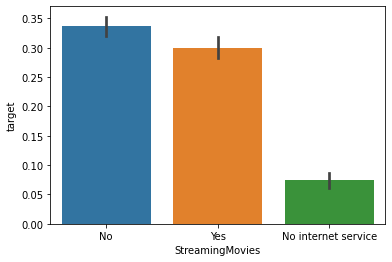

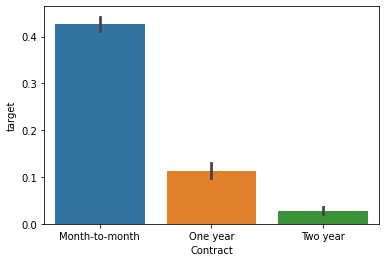

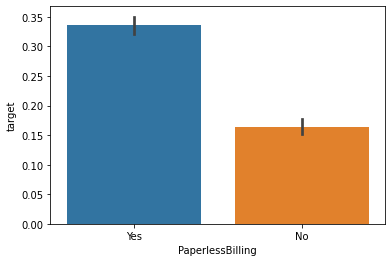

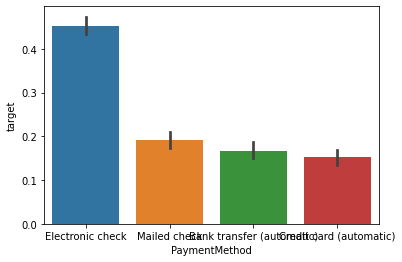

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

 - Why we are droping these 3 features?

In [39]:
char=char.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [40]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(7043, 22)

# Part 2 - Select K Best

In [41]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [42]:
select_features_df_char.iloc[0]

Partner_Yes                              1
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingMovies_No internet service      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           1
PaymentMethod_Mailed check               0
Name: 0, dtype: uint8

# Feature Selection - Numerical Indicator Features 

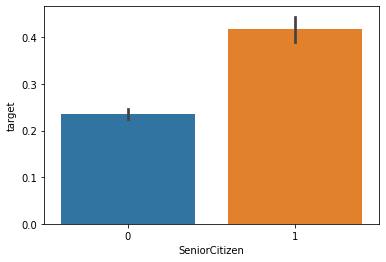

In [43]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_ind_merged, estimator=mean )
plt.show()

In [44]:
select_features_df_ind=ind

# Creating the Master Feature Set for Model Development

In [45]:
X_all=pd.concat([select_features_df_char,select_features_df_num,select_features_df_ind],axis=1,join="inner")

In [46]:
Y['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

# Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [48]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (4930, 24)
Shape of Testing Data (2113, 24)
Response Rate in Training Data target    0.266126
dtype: float64
Response Rate in Testing Data target    0.263606
dtype: float64


In [49]:
# import tensorflow libraries
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN Model

In [50]:
model = Sequential()

# adding the first hidden layer1
model.add(Dense(200, activation = 'relu'))

# adding the first hidden layer2
model.add(Dense(100, activation = 'sigmoid'))

# adding the first hidden layer2
model.add(Dense(50, activation = 'relu'))

# adding the ouput layer
model.add(Dense(1 , activation='sigmoid'))

In [51]:
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [52]:
history = model.fit(X_train , y_train, batch_size = 32 , epochs = 20 , validation_split = 0.2)

Epoch 1/20
124/124 [==============================] - 1s 4ms/step - loss: 0.5456 - accuracy: 0.7500 - val_loss: 0.5577 - val_accuracy: 0.7424
Epoch 2/20
124/124 [==============================] - 0s 3ms/step - loss: 0.5408 - accuracy: 0.7589 - val_loss: 0.5618 - val_accuracy: 0.7241
Epoch 3/20
124/124 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7530 - val_loss: 0.5546 - val_accuracy: 0.7444
Epoch 4/20
124/124 [==============================] - 0s 3ms/step - loss: 0.5371 - accuracy: 0.7622 - val_loss: 0.5602 - val_accuracy: 0.7170
Epoch 5/20
124/124 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7541 - val_loss: 0.5654 - val_accuracy: 0.7170
Epoch 6/20
124/124 [==============================] - 0s 3ms/step - loss: 0.5468 - accuracy: 0.7391 - val_loss: 0.5610 - val_accuracy: 0.7170
Epoch 7/20
124/124 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7381 - val_loss: 0.5774 - val_accuracy: 0.7170
Epoch 

In [53]:
history

In [54]:
history.history

{'accuracy': [0.75,
  0.758874237537384,
  0.7530425786972046,
  0.7621703743934631,
  0.7540568113327026,
  0.7390973567962646,
  0.7380831837654114,
  0.7380831837654114,
  0.7383367419242859,
  0.7380831837654114,
  0.7380831837654114,
  0.7380831837654114,
  0.7380831837654114,
  0.7380831837654114,
  0.7380831837654114,
  0.7380831837654114,
  0.7380831837654114,
  0.7380831837654114,
  0.7380831837654114,
  0.7380831837654114],
 'loss': [0.5456294417381287,
  0.5408339500427246,
  0.5358907580375671,
  0.5371053218841553,
  0.5442478060722351,
  0.5468267798423767,
  0.5475472211837769,
  0.5465264320373535,
  0.5477011203765869,
  0.5515085458755493,
  0.5536835789680481,
  0.5507450699806213,
  0.5722193717956543,
  0.570482075214386,
  0.5582593083381653,
  0.5681302547454834,
  0.5759263634681702,
  0.5778840184211731,
  0.5705472230911255,
  0.5581300258636475],
 'val_accuracy': [0.7423934936523438,
  0.7241379022598267,
  0.7444218993186951,
  0.7170385122299194,
  0.717038

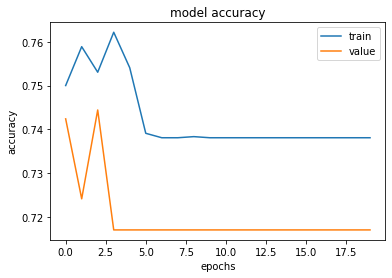

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'value'])
plt.show()

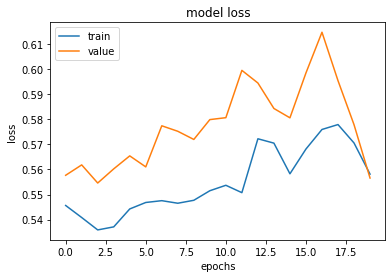

In [56]:
# Graph for value loss analysis
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'value'])
plt.show()

In [57]:
# Predict on Unseen data
y_pred = model.predict(X_test)
y_pred

array([[0.2506258 ],
       [0.44251478],
       [0.2506258 ],
       ...,
       [0.2506258 ],
       [0.42229062],
       [0.2506258 ]], dtype=float32)

In [58]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [59]:
# model score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.7363937529578798

# Save Model

In [60]:
model.save('churn_model.h5')

In [63]:
#flask
from tensorflow.keras import models
test_model = models.load_model('churn_model.h5')
model_test = test_model.predict([[1, 0, 3, 4, 1, 4, 21, 1, 6, 7, 1, 1, 2, 6, 1, 9 , 10, 11 ,1, 1 , 2, 0, 18, 1]])

In [64]:
model_test = (model_test > 0.5)

In [65]:
model_test

array([[False]])